# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [30]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

import warnings
warnings.filterwarnings("ignore")

In [31]:
# Read the Mapbox API key
load_dotenv()
mapbox_token = os.getenv("MAPBOX_API_KEY")

# Import Data

In [32]:
# Import the CSVs to Pandas DataFrames
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


In [33]:
file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

<AxesSubplot:xlabel='year'>

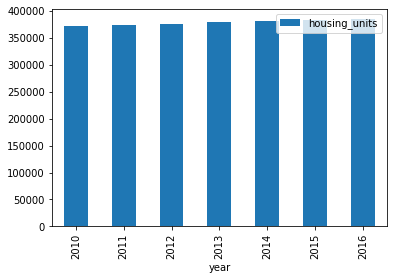

In [34]:
# Define Panel Visualization Functions
def housing_units_per_year(sfo_data):
    """Housing Units Per Year."""
    
    sfo_data_mean = sfo_data[['housing_units']].groupby('year').mean()
    plt = sfo_data_mean.plot(kind='bar')
    return plt

housing_units_per_year(sfo_data)

<AxesSubplot:xlabel='year'>

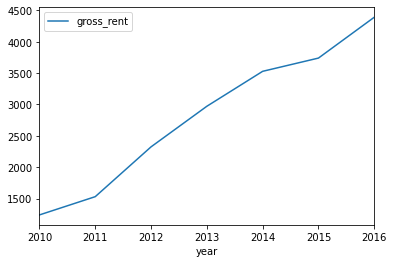

In [35]:
def average_gross_rent(sfo_data):
    """Average Gross Rent in San Francisco Per Year."""

    average_costs = sfo_data[['gross_rent']].groupby('year').mean()
    plt = average_costs.plot(kind='line')
    return plt

average_gross_rent(sfo_data)

<AxesSubplot:xlabel='year'>

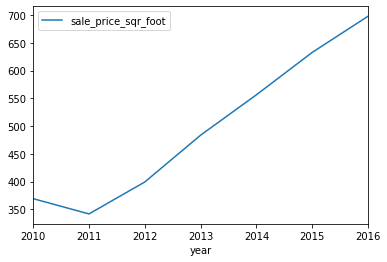

In [36]:
def average_sales_price(sfo_data):
    """Average Sales Price Per Year."""

    average_costs = sfo_data[['sale_price_sqr_foot']].groupby('year').mean()
    plt = average_costs.plot(kind='line')
    return plt

average_sales_price(sfo_data)

In [37]:
   #def top_most_expensive_neighborhoods():
    #"""Top 10 Most Expensive Neighborhoods."""

costs = sfo_data.groupby(['year', 'neighborhood']).mean()
costs.reset_index(inplace=True)
costs.hvplot.line(
    "year",
    "sale_price_sqr_foot", 
    xlabel='year',
    ylabel = 'average sale price sqr foot',
    groupby="neighborhood"
    
)

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

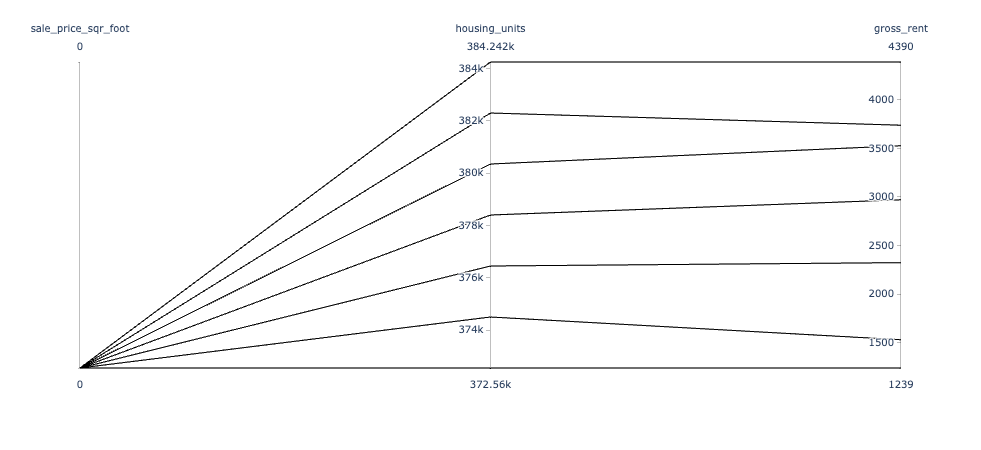

In [38]:
def parallel_coordinates():
    """Parallel Coordinates Plot."""
    
px.parallel_coordinates(expensive_neighborhoods, color='sale_price_sqr_foot')

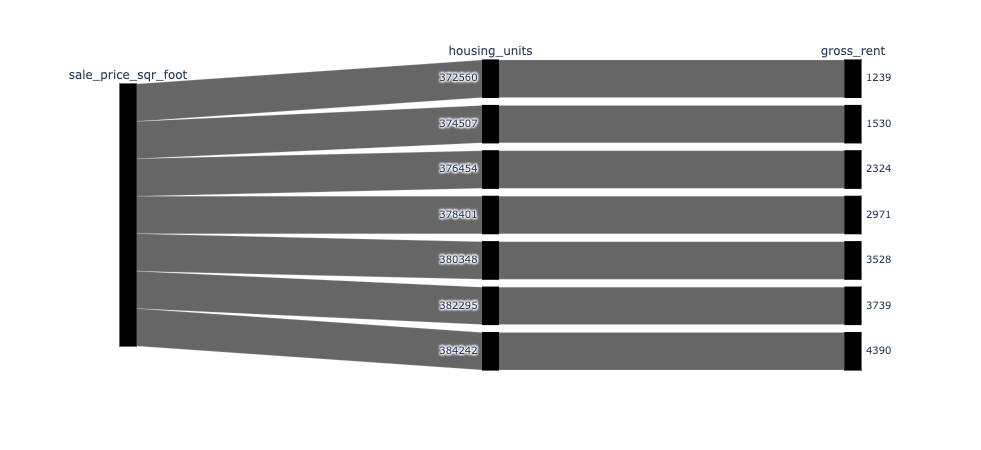

In [39]:
def parallel_categories():
    """Parallel Categories Plot."""
    
px.parallel_categories(expensive_neighborhoods, color='sale_price_sqr_foot')

In [40]:

def neighborhood_map():
    """Neighborhood Map"""
    
df_all_neighborhoods = sfo_data.groupby("neighborhood").mean()
df_all_neighborhoods.reset_index(inplace=True)
df_all_neighborhoods.rename(columns={"neighborhood":"Neighborhood"}, inplace=True)
df_all_neighborhoods = pd.merge(df_neighborhood_locations, df_all_neighborhoods, on='Neighborhood')
    
map = px.scatter_mapbox(
    df_all_neighborhoods,
    lat="Lat",
    lon='Lon',
    size='sale_price_sqr_foot',
    color='gross_rent',
    size_max=15,
    zoom=11,
    hover_name='Neighborhood',
    title='Average Values by Neighborhood',)

map.show()

In [133]:
#def neighborhood_map():
    #"""Neighborhood Map"""
    
file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)
    
df_all_neighborhoods = sfo_data.groupby("neighborhood").mean()
df_all_neighborhoods.reset_index(inplace=True)
df_all_neighborhoods.rename(columns={"neighborhood":"Neighborhood"}, inplace=True)
df_all_neighborhoods = pd.merge(df_neighborhood_locations, df_all_neighborhoods, on='Neighborhood')
    
map = px.scatter_mapbox(
    df_all_neighborhoods,
    lat='Lat',
    lon='Lon',
    size='sale_price_sqr_foot',
    color='gross_rent',
    size_max=15,
    zoom=11,
    hover_name='Neighborhood',
    title="Average SFO Neighborhood Values",)

map.show()

## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

In [41]:
# YOUR CODE HERE!

## Serve the Panel Dashboard